# Desition Trees
This practical example using the DecisionTreeClassifier from the scikit-learn library to classify whether a person earns more than $50,000 based on certain features.

#### 1. Import the required libraries.
Import necessary libraries for data manipulation, visualization, and linear regression.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### 2. Load data from csv to pnadas dataset. 

In [12]:
data = {
    'Age': [25, 32, 47, 51, 62, 23, 31, 40, 34, 58],
    'Experience': [1, 5, 20, 23, 30, 0, 4, 15, 10, 27],
    'Education': [12, 16, 16, 18, 20, 12, 14, 16, 16, 18],  # years of education
    'Income>50K': [0, 0, 1, 1, 1, 0, 0, 1, 0, 1]  # Binary target variable
}
data = pd.DataFrame(data)

#### 3. Visualize Data correlation: 
Plot a correlation matrix to explain relations between variables.

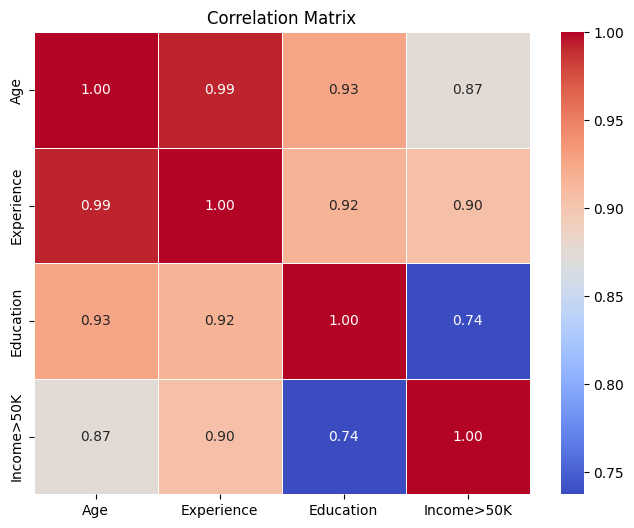

In [13]:
corr_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### 4. Split Data
Split the dataset into training and testing sets.

In [15]:
X = df[['Age', 'Experience', 'Education']]
y = df['Income>50K']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 5. Train the Linear Regression Model
Create and train a linear regression model using the training data.

In [16]:
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

#### 6. Make Predictions
Use the trained model to predict salaries on the test set.

In [17]:
y_pred = tree_model.predict(X_test)

#### 7. Evaluate the Model
Calculate Mean Squared Error and R-squared to evaluate model performance.

In [18]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.67
Confusion Matrix:
[[2 1]
 [0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

- The model appears to be biased towards class 0, as it has a recall of 0.67 for class 0 but fails to predict class 1 at all.

- The lack of class 1 samples in the test set (or the small test size) likely skews the results. Ensure there is sufficient representation for each class.

- With only three test samples, the evaluation might not reflect the model's true performance. Larger datasets provide more reliable metrics.

#### 8. Visualize Results
Plot the tree.

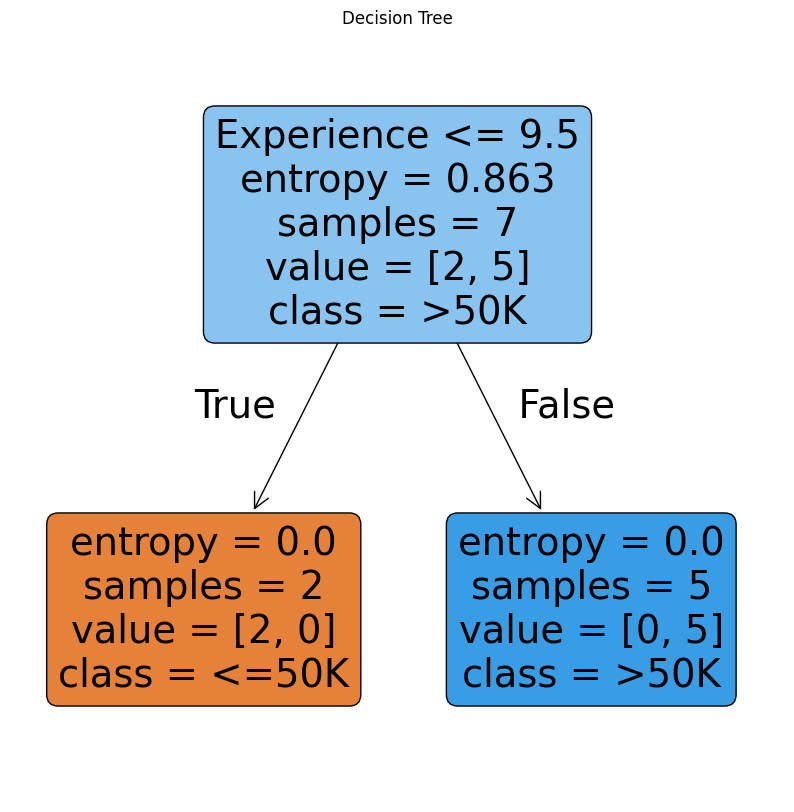

In [23]:
plt.figure(figsize=(10, 10))
plot_tree(tree_model, feature_names=X.columns, class_names=['<=50K', '>50K'], filled=True, rounded=True)
plt.title('Decision Tree')
plt.show()